# РТ 6

## генетика отжиг

изучение эволюционных алгоритмов (генетические алгоритмы) и метода имитации отжига для решения задач оптимизации.

ТО ЧТО ВНИЗУ ОБЯЗАТЕЛЬНО ЗАПУСТИТЬ ЕСЛИ НЕ В КОЛАБЕ ОТКРЫТО, ПОТОМУ ЧТО ПИТОН ТВАРЬ И НЕ ВКЛЮЧАЕТ НУЖНЫЕ БИБЛИОТЕКИ


In [11]:
import sys
!{sys.executable} -m pip install -q scikit-learn numpy pandas matplotlib scipy seaborn


## генетика

1. пример - Генетический алгоритм

Задача: Реализовать генетический алгоритм для оптимизации функции. Даны начальные хромосомы с двумя генами x и y. Показатель качества хромосомы оценивается функцией Z. Необходимо выполнить эволюцию популяции.


---
---

Поколение 1:
  Лучшее качество: 36.0000
  Среднее качество: 17.5000

Поколение 2:
  Лучшее качество: 30.2500
  Среднее качество: 25.2500

Поколение 3:
  Лучшее качество: 36.0214
  Среднее качество: 31.5080

Поколение 4:
  Лучшее качество: 36.0214
  Среднее качество: 33.1357

Поколение 5:
  Лучшее качество: 37.9738
  Среднее качество: 36.5095

Поколение 6:
  Лучшее качество: 41.3461
  Среднее качество: 35.9399

Поколение 7:
  Лучшее качество: 45.3521
  Среднее качество: 42.3189

Поколение 8:
  Лучшее качество: 45.1904
  Среднее качество: 43.1070

Поколение 9:
  Лучшее качество: 45.1904
  Среднее качество: 45.1904

Поколение 10:
  Лучшее качество: 45.1904
  Среднее качество: 45.1904

Лучшая хромосома: [3.806087   2.91629462]
Лучшее качество: 45.1904


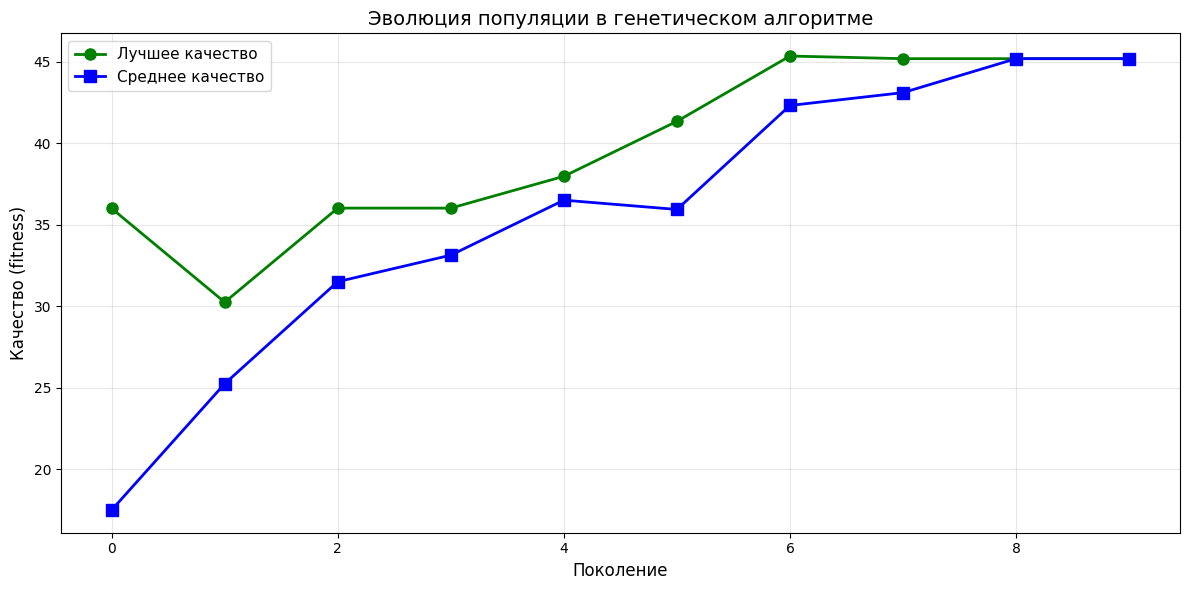


Генетический алгоритм успешно оптимизировал функцию качества через эволюцию популяции.


In [15]:
# - Генетический алгоритм
import numpy as np
import matplotlib.pyplot as plt

class GeneticAlgorithm:
    """Класс для реализации генетического алгоритма"""
    
    def __init__(self, fitness_function, pop_size=4, num_genes=2):
        self.fitness_function = fitness_function
        self.pop_size = pop_size
        self.num_genes = num_genes
        self.population = []
        self.history = []
        
    def initialize_population(self, initial_pop):
        """Инициализация начальной популяции"""
        self.population = initial_pop.copy()
        
    def evaluate_fitness(self):
        """Оценка качества всех хромосом"""
        fitness_values = []
        for chromosome in self.population:
            fitness = self.fitness_function(chromosome)
            fitness_values.append(fitness)
        return np.array(fitness_values)
    
    def crossover(self, parent1, parent2):
        """Кроссовер (скрещивание) двух родителей"""
        # Одноточечное скрещивание
        crossover_point = len(parent1) // 2
        child1 = np.concatenate([parent1[:crossover_point], parent2[crossover_point:]])
        child2 = np.concatenate([parent2[:crossover_point], parent1[crossover_point:]])
        return child1, child2
    
    def mutate(self, chromosome, mutation_rate=0.1):
        """Мутация хромосомы"""
        for i in range(len(chromosome)):
            if np.random.random() < mutation_rate:
                chromosome[i] += np.random.normal(0, 0.5)
        return chromosome
    
    def evolve(self, num_generations=10):
        """Эволюция популяции"""
        print("---")
        print("---")
        
        for generation in range(num_generations):
            # оценка качества
            fitness_values = self.evaluate_fitness()
            
            # Сохраняем историю
            best_fitness = np.max(fitness_values)
            avg_fitness = np.mean(fitness_values)
            self.history.append({
                'generation': generation,
                'best_fitness': best_fitness,
                'avg_fitness': avg_fitness,
                'population': self.population.copy()
            })
            
            print(f"\nПоколение {generation + 1}:")
            print(f"  Лучшее качество: {best_fitness:.4f}")
            print(f"  Среднее качество: {avg_fitness:.4f}")
            
            #
            sorted_indices = np.argsort(fitness_values)[::-1]
            sorted_population = [self.population[i] for i in sorted_indices]
            
            # Селекция - выбираем лучших
            parents = sorted_population[:2]
            
            # Кроссовер
            offspring = []
            for i in range(self.pop_size // 2):
                child1, child2 = self.crossover(parents[0], parents[1])
                offspring.append(child1)
                offspring.append(child2)
            
            # Мутация
            for i in range(len(offspring)):
                offspring[i] = self.mutate(offspring[i])
            
            # Формируем новое поколение
            self.population = offspring
        
        # Финальная оценка
        final_fitness = self.evaluate_fitness()
        best_idx = np.argmax(final_fitness)
        
        print(f"\n{'='*70}")
        print(f"{'='*70}")
        print(f"Лучшая хромосома: {self.population[best_idx]}")
        print(f"Лучшее качество: {final_fitness[best_idx]:.4f}")
        
        return self.population[best_idx], final_fitness[best_idx]

# определяем функцию качества (фитнес-функцию)
def fitness_function(chromosome):
    """Функция качества: Z = x^2 + y^2 + 2*x*y"""
    x, y = chromosome
    return x**2 + y**2 + 2*x*y

# инициализация начальной популяции
initial_population = [
    np.array([1.0, 2.0]),
    np.array([2.0, 1.0]),
    np.array([3.0, 3.0]),
    np.array([1.5, 2.5])
]

# алгоритма
ga = GeneticAlgorithm(fitness_function, pop_size=4, num_genes=2)
ga.initialize_population(initial_population)

# Эволюция
best_chromosome, best_fitness = ga.evolve(num_generations=10)

# визуализация процесса эволюции
generations = [h['generation'] for h in ga.history]
best_fitness_history = [h['best_fitness'] for h in ga.history]
avg_fitness_history = [h['avg_fitness'] for h in ga.history]

plt.figure(figsize=(12, 6))
plt.plot(generations, best_fitness_history, 'o-', linewidth=2, markersize=8, label='Лучшее качество', color='green')
plt.plot(generations, avg_fitness_history, 's-', linewidth=2, markersize=8, label='Среднее качество', color='blue')
plt.xlabel('Поколение', fontsize=12)
plt.ylabel('Качество (fitness)', fontsize=12)
plt.title('Эволюция популяции в генетическом алгоритме', fontsize=14)
plt.legend(fontsize=11)
plt.grid(True, alpha=0.3)
plt.tight_layout()
plt.show()

print("\nГенетический алгоритм успешно оптимизировал функцию качества через эволюцию популяции.")


## отжиг

пример - Имитация отжига для оптимизации

Задача: Реализовать метод имитации отжига для поиска оптимального решения. Метод моделирует процесс физического отжига металла.


---
---
Начальное решение: [-1.25459881  4.50714306]
Начальная стоимость: 52.1672
Начальная температура: 100

Итерация 100:
  Текущая температура: 0.5921
  Текущая стоимость: 4.1625
  Лучшая стоимость: 4.1625

Итерация 200:
  Текущая температура: 0.0035
  Текущая стоимость: 0.2721
  Лучшая стоимость: 0.2721

Итерация 300:
  Текущая температура: 0.0000
  Текущая стоимость: 0.0373
  Лучшая стоимость: 0.0373

Итерация 400:
  Текущая температура: 0.0000
  Текущая стоимость: 0.0373
  Лучшая стоимость: 0.0373

Итерация 500:
  Текущая температура: 0.0000
  Текущая стоимость: 0.0121
  Лучшая стоимость: 0.0121

Итерация 600:
  Текущая температура: 0.0000
  Текущая стоимость: 0.0105
  Лучшая стоимость: 0.0105

Итерация 700:
  Текущая температура: 0.0000
  Текущая стоимость: 0.0105
  Лучшая стоимость: 0.0105

Итерация 800:
  Текущая температура: 0.0000
  Текущая стоимость: 0.0105
  Лучшая стоимость: 0.0105

Итерация 900:
  Текущая температура: 0.0000
  Текущая стоимость: 0.0105
  Лучшая стоимость

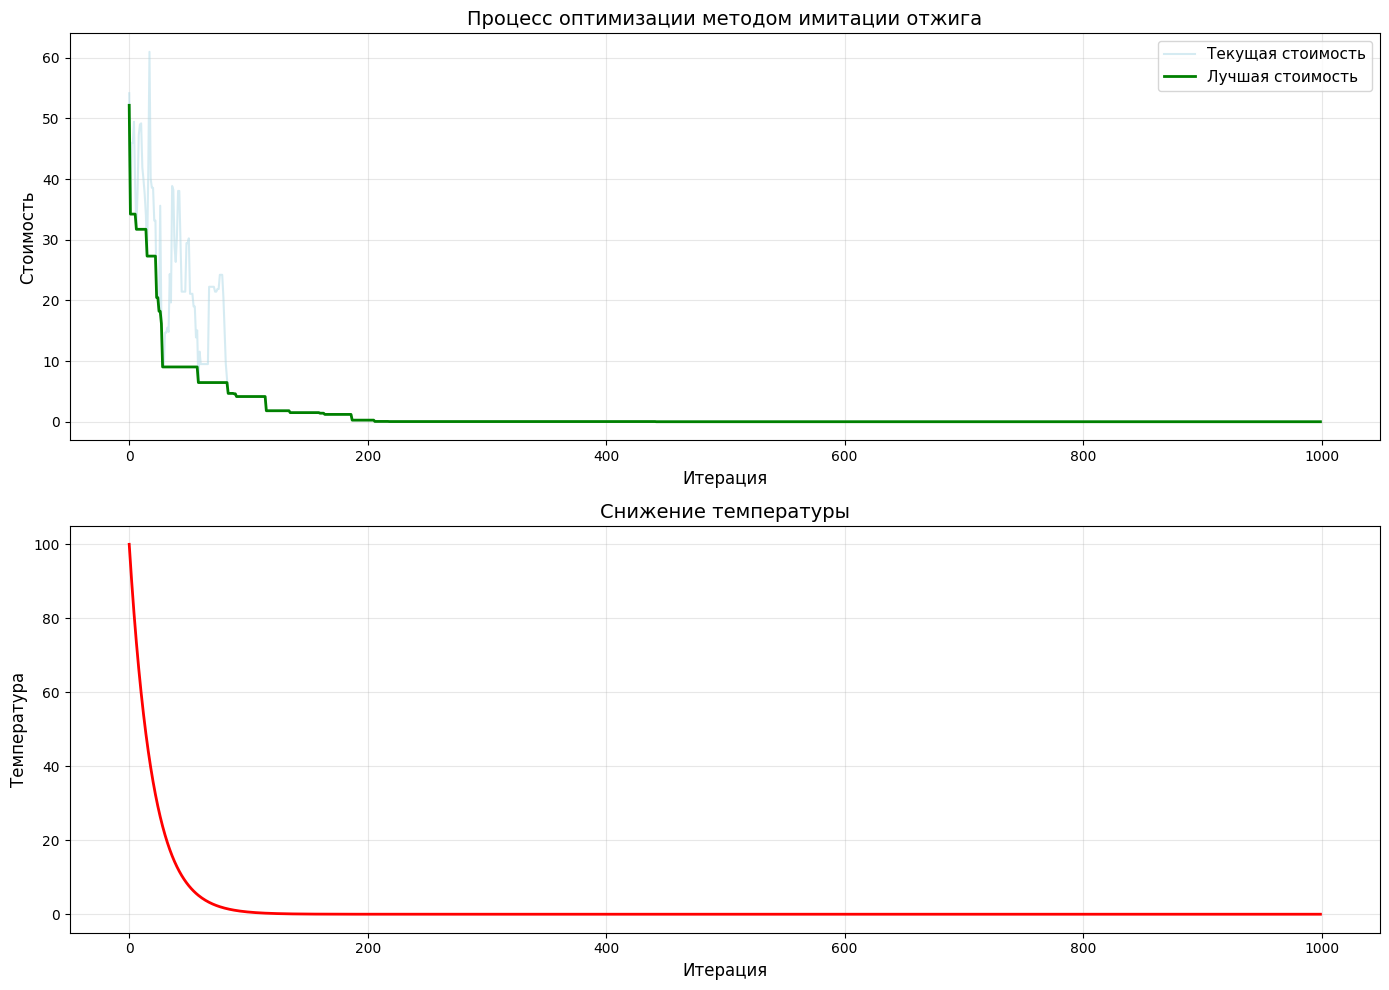


Метод имитации отжига успешно нашел приближенное оптимальное решение.
Начальная температура позволяет исследовать пространство решений,
а постепенное охлаждение обеспечивает сходимость к локальному минимуму.


In [14]:
# - Метод имитации отжига
import numpy as np
import matplotlib.pyplot as plt

class SimulatedAnnealing:
    """Класс для реализации метода имитации отжига"""
    
    def __init__(self, objective_function, initial_solution, initial_temp=100, cooling_rate=0.95):
        self.objective_function = objective_function
        self.current_solution = initial_solution.copy()
        self.best_solution = initial_solution.copy()
        self.current_cost = objective_function(initial_solution)
        self.best_cost = self.current_cost
        self.temperature = initial_temp
        self.cooling_rate = cooling_rate
        self.history = []
        
    def generate_neighbor(self, solution):
        """Генерация соседнего решения"""
        neighbor = solution.copy()
        #
        idx = np.random.randint(0, len(solution))
        neighbor[idx] += np.random.uniform(-1, 1)
        return neighbor
    
    def acceptance_probability(self, current_cost, new_cost, temperature):
        """Вероятность принятия нового решения"""
        if new_cost < current_cost:
            return 1.0
        else:
            return np.exp(-(new_cost - current_cost) / temperature)
    
    def optimize(self, max_iterations=1000):
        """Процесс оптимизации"""
        print("---")
        print("---")
        print(f"Начальное решение: {self.current_solution}")
        print(f"Начальная стоимость: {self.current_cost:.4f}")
        print(f"Начальная температура: {self.temperature}")
        
        for iteration in range(max_iterations):
            # Генерируем соседнее решение
            new_solution = self.generate_neighbor(self.current_solution)
            new_cost = self.objective_function(new_solution)
            
            # Решаем, принять ли новое решение
            acceptance_prob = self.acceptance_probability(self.current_cost, new_cost, self.temperature)
            
            if acceptance_prob > np.random.random():
                self.current_solution = new_solution
                self.current_cost = new_cost
                
                # Обновляем лучшее решение
                if new_cost < self.best_cost:
                    self.best_solution = new_solution.copy()
                    self.best_cost = new_cost
            
            # Сохраняем историю
            self.history.append({
                'iteration': iteration,
                'temperature': self.temperature,
                'current_cost': self.current_cost,
                'best_cost': self.best_cost
            })
            
            # Охлаждение
            self.temperature *= self.cooling_rate
            
            # Вывод промежуточных результатов
            if (iteration + 1) % 100 == 0:
                print(f"\nИтерация {iteration + 1}:")
                print(f"  Текущая температура: {self.temperature:.4f}")
                print(f"  Текущая стоимость: {self.current_cost:.4f}")
                print(f"  Лучшая стоимость: {self.best_cost:.4f}")
        
        print(f"\n{'='*70}")
        print(f"{'='*70}")
        print(f"Лучшее решение: {self.best_solution}")
        print(f"Лучшая стоимость: {self.best_cost:.4f}")
        
        return self.best_solution, self.best_cost

# определяем функцию цели (целевую функцию для минимизации)
def objective_function(solution):
    """Функция Растригина (тестовая функция оптимизации)"""
    A = 10
    n = len(solution)
    return A * n + sum([(x**2 - A * np.cos(2 * np.pi * x)) for x in solution])

# Начальное решение (случайная точка)
np.random.seed(42)
initial_solution = np.random.uniform(-5, 5, 2)

# имитации отжига
sa = SimulatedAnnealing(
    objective_function=objective_function,
    initial_solution=initial_solution,
    initial_temp=100,
    cooling_rate=0.95
)

# Оптимизация
best_solution, best_cost = sa.optimize(max_iterations=1000)

# визуализация процесса оптимизации
iterations = [h['iteration'] for h in sa.history]
temperatures = [h['temperature'] for h in sa.history]
current_costs = [h['current_cost'] for h in sa.history]
best_costs = [h['best_cost'] for h in sa.history]

fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(14, 10))

# График 1: Стоимость решений
ax1.plot(iterations, current_costs, alpha=0.5, label='Текущая стоимость', color='lightblue')
ax1.plot(iterations, best_costs, linewidth=2, label='Лучшая стоимость', color='green')
ax1.set_xlabel('Итерация', fontsize=12)
ax1.set_ylabel('Стоимость', fontsize=12)
ax1.set_title('Процесс оптимизации методом имитации отжига', fontsize=14)
ax1.legend(fontsize=11)
ax1.grid(True, alpha=0.3)

# График 2: Изменение температуры
ax2.plot(iterations, temperatures, linewidth=2, color='red')
ax2.set_xlabel('Итерация', fontsize=12)
ax2.set_ylabel('Температура', fontsize=12)
ax2.set_title('Снижение температуры', fontsize=14)
ax2.grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

print("\nМетод имитации отжига успешно нашел приближенное оптимальное решение.")
print("Начальная температура позволяет исследовать пространство решений,")
print("а постепенное охлаждение обеспечивает сходимость к локальному минимуму.")
